In [ ]:
!pip install Pillow==10.1.0 torch==2.1.2 torchvision==0.16.2 transformers==4.40.0 sentencepiece==0.1.99

In [3]:
!pip install pytesseract

In [14]:
!pip install opencv-python

In [4]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'

In [5]:
import cv2
import matplotlib.pyplot as plt


In [6]:
from transformers import pipeline

nlp = pipeline(
    "document-question-answering",
    model="impira/layoutlm-document-qa",
)


C:\Users\rakti\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [8]:
import pandas as pd
df=pd.DataFrame(columns=["Invoice","Date","Client","Seller","Amount"])

In [9]:
ques=["What is the invoice number?","What is the date of issue?","What is the name of the client?",
     "What is the name of the seller?","What is the total gross worth in dollars?"]
answers=["Invoice","Date","Client","Seller","Amount"]
#out=[]
for i in range(1,7):
    ans=""
    image_path=f"images/rec{i}.jpg"
    for q in range(len(ques)):
        res=nlp(image_path,ques[q])
        #print(res[0]["answer"])
        #ans+=answers[q]+":"+res[0]["answer"]+"\n"
        df.loc[i,answers[q]]=res[0]["answer"]
    #out.append(ans)

<b>Output in tabular form</b>

In [10]:
df

,Invoice,Date,Client,Seller,Amount
1,40378170,10/15/2012,"Jackson, Odonnell and Jackson","Patel, Thompson and Montgomery","8,25"
2,61356291,09/06/2012,Rodriguez-Stevens,"Chapman, Kim and Green","212,09"
3,27301261,10/09/2012,Hernandez-Anderson,Williams LLC,"544,46"
4,70123184,01/28/2016,Cooley Ltd,"Kelly, Hernandez and Vaughan","749,99"
5,19537372,07/28/2012,Rodriguez Ltd,Richardson LLC,"329,89"
6,13194726,05/29/2021,Sims PLC,Hopkins and Sons,"640,12"


<b>Validation</b>

Invoice number::40378170
Date of issue::10/15/2012
Client::Jackson, Odonnell and Jackson
Seller::Patel, Thompson and Montgomery
Total::8,25



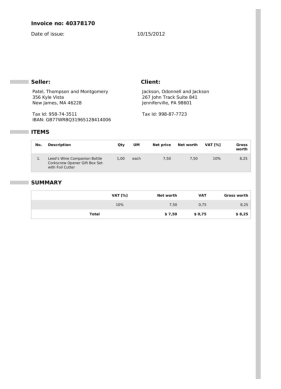

In [29]:
plt.imshow(cv2.imread("images/rec1.jpg"))
plt.axis('off')
print(out[0])

Invoice number::61356291
Date of issue::09/06/2012
Client::Rodriguez-Stevens
Seller::Chapman, Kim and Green
Total::212,09



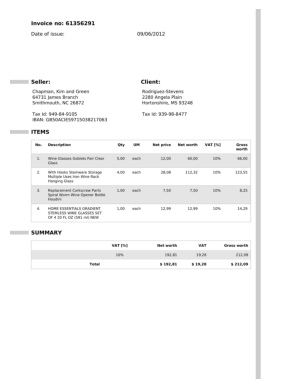

In [30]:
plt.imshow(cv2.imread("images/rec2.jpg"))
plt.axis('off')
print(out[1])

Invoice number::27301261
Date of issue::10/09/2012
Client::Hernandez-Anderson
Seller::Williams LLC
Total::544,46



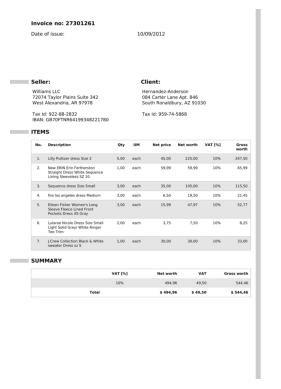

In [31]:
plt.imshow(cv2.imread("images/rec3.jpg"))
plt.axis('off')
print(out[2])

Invoice number::70123184
Date of issue::01/28/2016
Client::Cooley Ltd
Seller::Kelly, Hernandez and Vaughan
Total::749,99



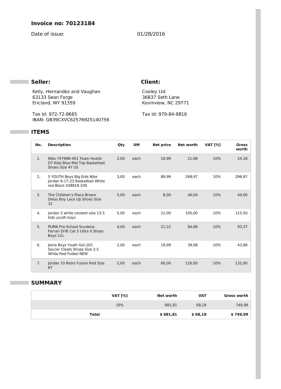

In [32]:
plt.imshow(cv2.imread("images/rec4.jpg"))
plt.axis('off')
print(out[3])

Invoice number::19537372
Date of issue::07/28/2012
Client::Rodriguez Ltd
Seller::Richardson LLC
Total::329,89



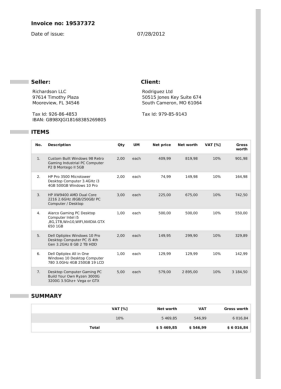

In [33]:
plt.imshow(cv2.imread("images/rec5.jpg"))
plt.axis('off')
print(out[4])

Invoice number::13194726
Date of issue::05/29/2021
Client::Sims PLC
Seller::Hopkins and Sons
Total::640,12



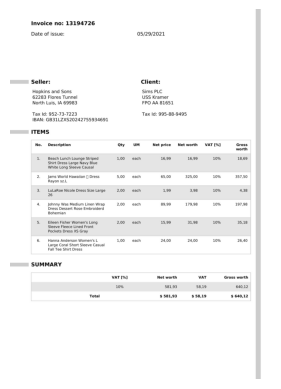

In [34]:
plt.imshow(cv2.imread("images/rec6.jpg"))
plt.axis('off')
print(out[5])